In [59]:
# install packages
import pandas as pd
import numpy as np
import dowhy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# import dataset & column renaming
lalonde_df = pd.read_csv("lalonde_dataset.csv", index_col=0)
integer_cols =  ["treat", "age", "educ", "black", "hisp", "married", "nodegr", "u74", "u75"]
lalonde_df[integer_cols] = lalonde_df[integer_cols].astype("int64")
lalonde_df.rename(columns = {
    "treat":"treatment",
    "re78":"y",
    "re75":"earnings75",
    "re74":"earnings74",
    "u74":"unemployed74",
    "u75":"unemployed75",
    "educ":"education",
    "nodegr":"non_degree",
    "hisp":"hispanic",
}, inplace=True)
lalonde_df = lalonde_df[["age", "education", "black", "hispanic", "married", "non_degree", "earnings74", "earnings75", "unemployed74", "unemployed75", "treatment", "y"]]
lalonde_df.head()

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment,y
0,23,10,1,0,0,1,0.0,0.0,1,1,0,0.00
1,26,12,0,0,0,0,0.0,0.0,1,1,0,12383.68
2,22,9,1,0,0,1,0.0,0.0,1,1,0,0.00
3,18,9,1,0,0,1,0.0,0.0,1,1,0,10740.08
4,45,11,1,0,0,1,0.0,0.0,1,1,0,11796.47


In [34]:
# summary statistics
lalonde_df.describe()

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment,y
count,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,0.732584,0.649438,0.415730,5300.763699
std,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,0.443109,0.477683,0.493402,6631.491695
min,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3701.812000
75%,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,1.000000,1.000000,1.000000,8124.715000
max,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,1.000000,1.000000,1.000000,60307.930000


['age', 'education', 'black', 'hispanic', 'married', 'non_degree', 'earnings74', 'earnings75', 'unemployed74', 'unemployed75', 'treatment', 'y']


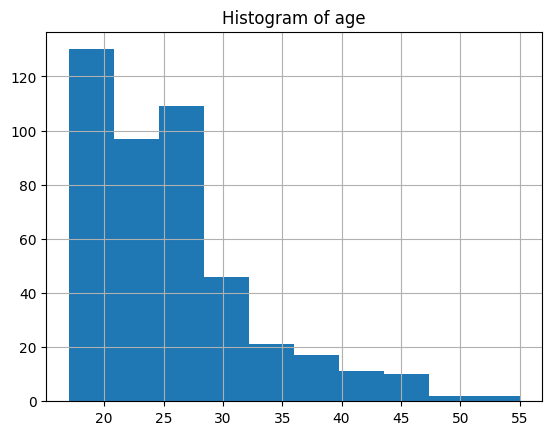

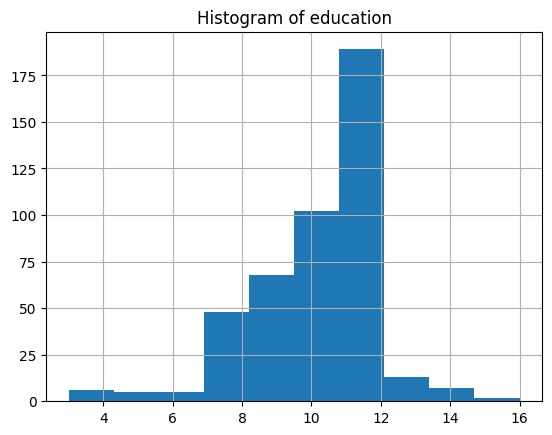

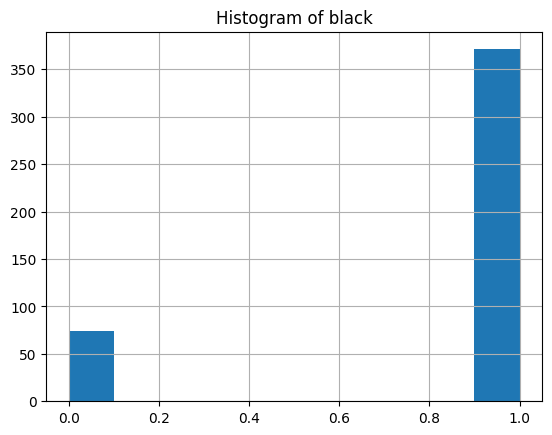

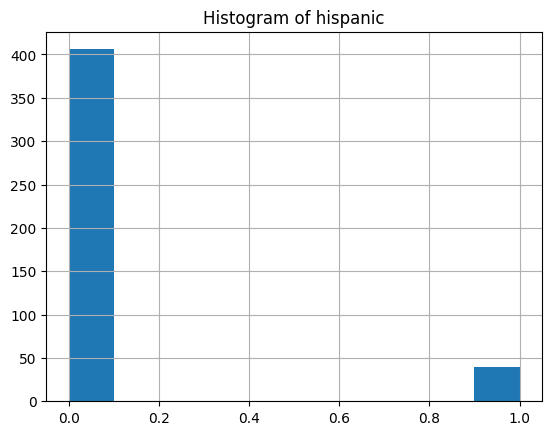

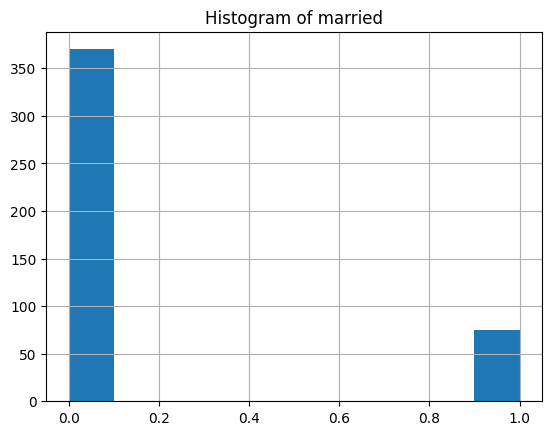

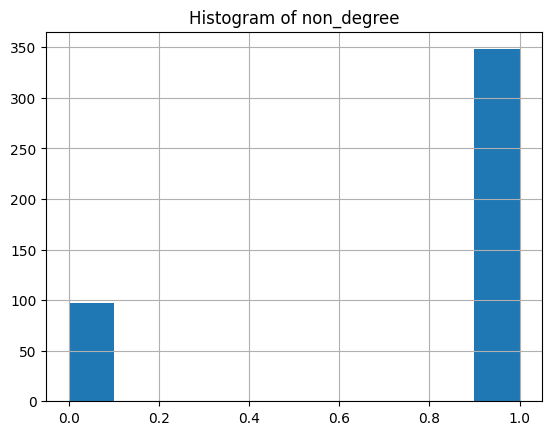

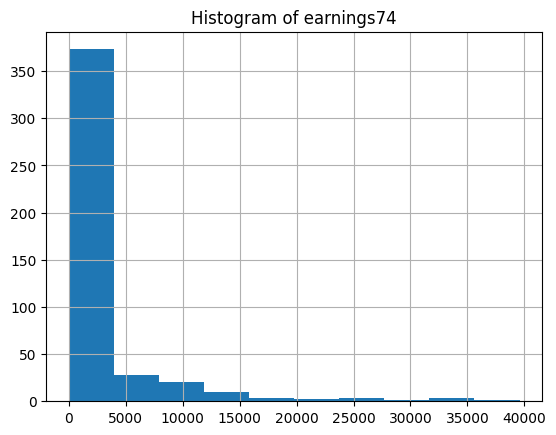

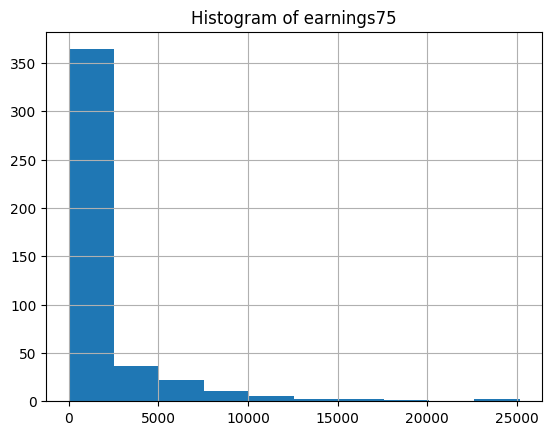

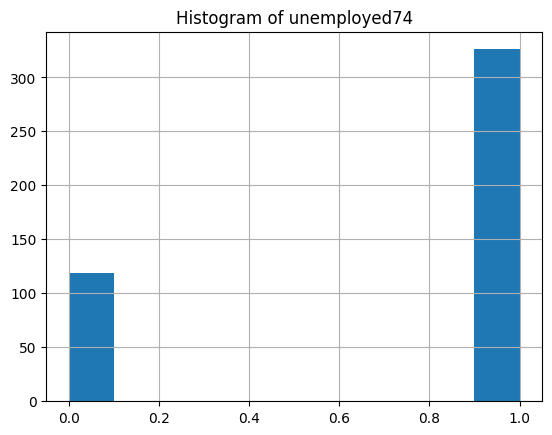

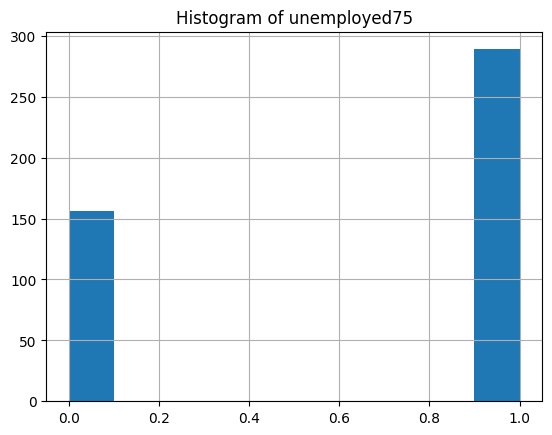

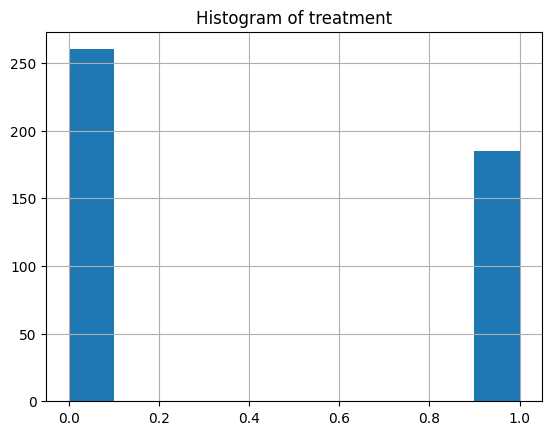

In [35]:
columns = lalonde_df.select_dtypes('number').columns.values.tolist()
print(columns)
columns.remove("y")

for col in columns:
    lalonde_df.hist(col)
    plt.title(f"Histogram of {col}")

In [36]:
lalonde_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445 entries, 0 to 444
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           445 non-null    int64  
 1   education     445 non-null    int64  
 2   black         445 non-null    int64  
 3   hispanic      445 non-null    int64  
 4   married       445 non-null    int64  
 5   non_degree    445 non-null    int64  
 6   earnings74    445 non-null    float64
 7   earnings75    445 non-null    float64
 8   unemployed74  445 non-null    int64  
 9   unemployed75  445 non-null    int64  
 10  treatment     445 non-null    int64  
 11  y             445 non-null    float64
dtypes: float64(3), int64(9)
memory usage: 45.2 KB


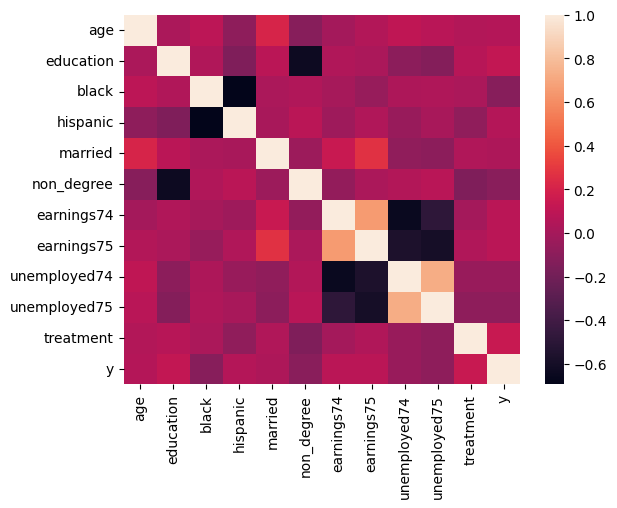

In [41]:
corr = lalonde_df.select_dtypes('number').corr()
sns.heatmap(corr)
plt.show()

Observations from Correlation Matrix:
- race: black and hispanic correlates negatively (-0.69) (because there are 35 people that belong to neither group)
- education: education and non_degree correlate negatively (-0.64)
- marriage: slight positive correlation between marriage and earnings (0.14, 0.27)
- unemployment: unemployment in 74 & 75 correlates positively (0.73)
- earnings: earnings in 74 & 75 correlate positively (0.65)
- unemployment & earnings: correlate negatively (-0.56, -0.6)
- treatment: treatment and y (earning in 78) correlate positively (0.13)

In [49]:
lalonde_df.select_dtypes('number').corr()
#sns.heatmap(corr)
#plt.show()

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment,y
age,1.000000,0.022964,0.087171,-0.090157,0.210072,-0.112838,-0.001229,0.052626,0.102457,0.075597,0.052977,0.057166
education,0.022964,1.000000,0.045405,-0.144835,0.081613,-0.635575,0.041189,0.025855,-0.092843,-0.127603,0.070890,0.116166
black,0.087171,0.045405,1.000000,-0.693969,0.023731,0.041948,0.005446,-0.056389,0.030152,0.038685,0.021602,-0.114958
hispanic,-0.090157,-0.144835,-0.693969,1.000000,0.009064,0.086638,-0.028485,0.040805,-0.046158,0.011191,-0.084066,0.058606
married,0.210072,0.081613,0.023731,0.009064,1.000000,-0.038554,0.142522,0.267913,-0.080614,-0.096973,0.046531,0.032672
non_degree,-0.112838,-0.635575,0.041948,0.086638,-0.038554,1.000000,-0.067828,0.020787,0.049934,0.079798,-0.151012,-0.106063
earnings74,-0.001229,0.041189,0.005446,-0.028485,0.142522,-0.067828,1.000000,0.655201,-0.649466,-0.483767,-0.001054,0.085384
earnings75,0.052626,0.025855,-0.056389,0.040805,0.267913,0.020787,0.655201,1.000000,-0.564590,-0.595538,0.041519,0.084599
unemployed74,0.102457,-0.092843,0.030152,-0.046158,-0.080614,0.049934,-0.649466,-0.564590,1.000000,0.726574,-0.046647,-0.047601
unemployed75,0.075597,-0.127603,0.038685,0.011191,-0.096973,0.079798,-0.483767,-0.595538,0.726574,1.000000,-0.087400,-0.087869


In [39]:
lalonde_df[(lalonde_df["black"] == 0) & (lalonde_df["hispanic"]== 0)]

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment,y
1,26,12,0,0,0,0,0.000,0.0000,1,1,0,12383.680
6,24,8,0,0,0,1,0.000,0.0000,1,1,0,10569.270
13,19,11,0,0,0,1,0.000,0.0000,1,1,0,0.000
55,24,12,0,0,0,0,0.000,0.0000,1,1,0,11294.630
112,28,8,0,0,0,1,0.000,0.0000,1,1,0,8190.421
127,27,12,0,0,0,0,0.000,0.0000,1,1,0,14792.900
150,17,8,0,0,0,1,0.000,0.0000,1,1,0,10210.990
155,19,10,0,0,0,1,0.000,0.0000,1,1,0,3194.010
156,17,11,0,0,0,1,0.000,0.0000,1,1,0,0.000
185,27,13,0,0,0,0,5214.306,474.5018,0,0,0,4812.576


In [63]:
# Linear regression
from sklearn.linear_model import LinearRegression

X = lalonde_df[columns]
y = lalonde_df["y"]

lm = LinearRegression().fit(X,y)
lm.score(X,y)


In [93]:
# AdaBoost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from time import time

X = lalonde_df.drop('y', axis=1)
y = lalonde_df['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Time-keeping for the Grid-search
start_time = time()
# Define AdaBoostRegressor
ada_boost = RandomForestRegressor(n_jobs=1, random_state=0, max_features='sqrt')

# Hyperparameter grid 
param_grid = {
    'n_estimators': np.arange(start=100, stop=500, step=100),
    'max_depth': np.arange(start=3, stop=10, step=1),
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5 , 10, 20],
    'max_samples': [10, 50, 100],
}

# Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=ada_boost, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error',
                           verbose=1)
grid_search.fit(X_train, y_train)

# Time-keeping for Grid-search
end_time = time()
print(f"Total time: {end_time - start_time}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train model with best hyperparameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

# Predictions on test set
y_test_pred = best_model.predict(X_test)

# Evaluate on test set
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:", test_mse)

# R-squared on test set
print("Test R-squared:", best_model.score(X_test, y_test))
print("Test R-squared:", r2_score(y_test, y_test_pred))

print(pd.DataFrame(data={"y": y_test, "y_pred": y_test_pred}))



Fitting 5 folds for each of 1008 candidates, totalling 5040 fits
Total time: 535.59223985672
Best Hyperparameters: {'max_depth': 6, 'max_samples': 50, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}
Test MSE: 24417140.527160536
Test R-squared: -0.1379089701402596
Test R-squared: -0.1379089701402596
            y       y_pred
328  8546.715  7647.296517
252     0.000  6647.354325
122  3644.655  3797.852417
102  5712.643  4402.733395
71      0.000  2893.006669
..        ...          ...
400  4849.559  5569.417775
190  7300.498  6366.199493
371  6210.670  6121.128227
135  4657.273  3749.792606
49   5088.760  2485.115288

[89 rows x 2 columns]


In [94]:
pd.DataFrame(data={"y": y_test, "y_pred": y_test_pred})

,y,y_pred
328,8546.715,7647.296517
252,0.000,6647.354325
122,3644.655,3797.852417
102,5712.643,4402.733395
71,0.000,2893.006669
...,...,...
400,4849.559,5569.417775
190,7300.498,6366.199493
371,6210.670,6121.128227
135,4657.273,3749.792606


In [95]:
X_test

,age,education,black,hispanic,married,non_degree,earnings74,earnings75,unemployed74,unemployed75,treatment
328,45,5,1,0,1,1,0.0000,0.00000,1,1,1
252,28,11,1,0,1,1,824.3889,10033.91000,0,0,0
122,20,8,1,0,0,1,0.0000,0.00000,1,1,0
102,19,9,1,0,0,1,0.0000,0.00000,1,1,0
71,22,10,1,0,0,1,0.0000,0.00000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
400,24,9,1,0,0,1,9154.7000,2288.67500,0,0,1
190,18,9,0,0,0,1,0.0000,559.59600,1,0,0
371,17,9,0,1,0,1,445.1704,74.34345,0,0,1
135,18,11,1,0,0,1,0.0000,0.00000,1,1,0
